In [1]:
import pandas as pd
import numpy as np

/var/folders/gd/yvbn44jx009_vnk8bhn2_k280000gn/T/ipykernel_76454/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
!pip3 install seaborn
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 1.4 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 590.8 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

##import data

In [6]:
data_df = pd.read_csv('Data.csv')
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
## data imputation (missing data replacement)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [12]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data / len(data_df)*100
    print(f"Collumn: {col}: has {missing_percent}%")

Collumn: Country: has 0.0%
Collumn: Age: has 10.0%
Collumn: Salary: has 10.0%
Collumn: Purchased: has 0.0%


<Axes: >

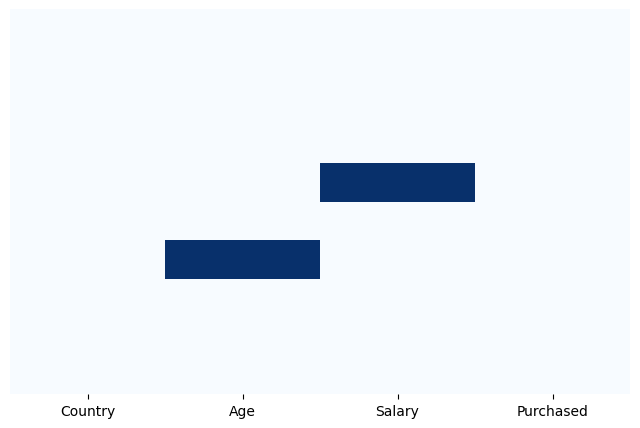

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data_df.isna(), cbar=False, yticklabels=False, cmap='Blues')

In [20]:
x = data_df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [21]:
y = data_df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [30]:
from sklearn.impute import SimpleImputer

# create an instance of class simpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(x[:, 1:3])
x [:, 1:3] = imputer.transform(x[:, 1:3])

In [31]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [32]:
#Encode Categorical Data

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [34]:
#set up

In [35]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [37]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [38]:
# splitting the dataset into the training set and test set

In [39]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [41]:
#feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])

In [43]:
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [44]:
x_test[:, 3:] = sc.transform(x_test[:,3:])

In [45]:
x_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)